In [1]:
import pandas as  pd
import numpy as np
import utils
import subprocess
MaCroDNA_GENE = "2000_genes_log"

## Step 1: Run the integration methods

### Step 1.1 Run clonealing

You can run the rscript from python using package subprocess.

You can also run it directly using R and change the working directory to the folder where Analysis.jpynb is.

In [ ]:
subprocess.call("/usr/bin/Rscript --vanilla Methods/run_clonealign.R", shell=True)

### Step 1.2 Run Seurat

You can run the rscript from python using package subprocess.

You can also run it directly using R and change the working directory to the folder where Analysis.jpynb is.

In [ ]:
subprocess.call("/usr/bin/Rscript --vanilla Methods/run_seurat.R", shell=True)

### Step 1.3 Run MaCroDNA

There are four different preprocess strategies for the data: "2000_genes_log", "all_genes_log", "all-genes_raw", "noX_genes_raw". And one should be specified while running MaCroDNA

In [ ]:

subprocess.call("python Methods/random_baseline.py", shell=True)

## Step 1.3 Run Random Baseline

In [ ]:
subprocess.call("python Methods/macrodna.py "+MaCroDNA_GENE, shell=True)

## Step 2 Prepare the results for further analysis and plots

### Step 2.1 Basic information for the integration results

In [2]:
patient_list = ["CRC04", "CRC10", "CRC11"]
method_list = ["clonealign", "Seurat", "MaCroDNA"]

cluster_info = {"Agglomerative": {"cluster_key":
                                  {"untransformed": [str(x)+"_clusters" for x in range(6, 13)],
                                  "log": [str(x)+"_clusters" for x in range(6, 13)]},
                                 "cluster_dir": "../data/clusters/Agglomerative/",
                                 },
               "intNMF": {"cluster_key": 
                          {"untransformed": ["untransformed_crc04_2", "untransformed_crc10_2","untransformed_crc11_2"],
                          "log": ["log_crc04_2", "log_crc10_3","log_crc11_3"]},
                         "cluster_dir": "../data/clusters/intNMF/",
                         }}

"""
Specify the cluster method and cluster transformation method
for infering clones from the CNV (scDNA-seq) data

----------
Variables
----------
CLUSTER_METHOD: string, method used for getting clusters, either "Agglomerative" or "intNMF"
CLUSTER_TRANS: string, the transformation used for the data before clustering, either "untransformed" or "log"
INTGR_DIR: string, where the integration results are

"""

CLUSTER_METHOD = "Agglomerative"
CLUSTER_TRANS = "log"
INTGR_DIR = "Result/"
RANDOM_PATH = "Result/random_baseline_result.csv"


assert CLUSTER_METHOD == "Agglomerative" or CLUSTER_METHOD == "intNMF"
assert CLUSTER_TRANS == "untransformed" or CLUSTER_TRANS == "log"

### Step 2.2 Get the integration results for each method

In [3]:
"""
Read the cluster results 
"""
intgr_results = utils.read_integration_result(CLUSTER_METHOD, CLUSTER_TRANS, cluster_info, INTGR_DIR)

### Step 2.3 Plot the results

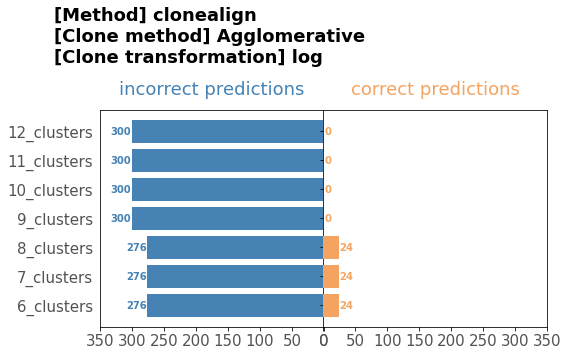

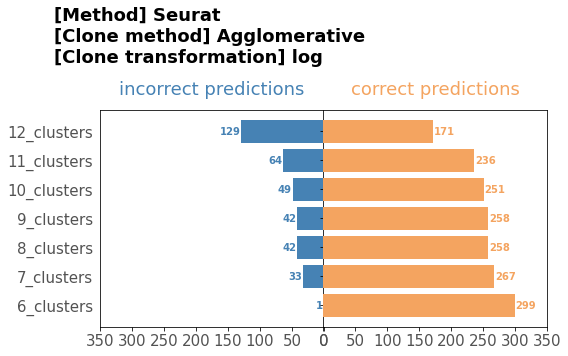

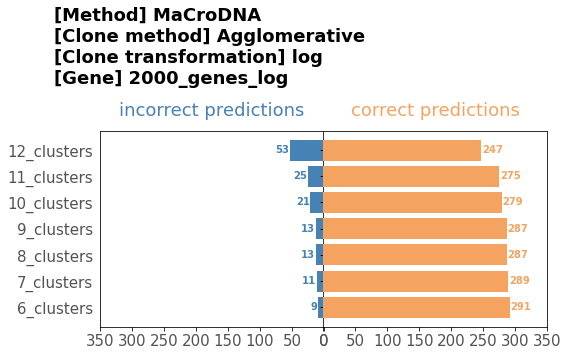

In [4]:
"""
Barplots
"""
utils.plot_results_barplot(intgr_results,"clonealign",CLUSTER_METHOD,CLUSTER_TRANS,cluster_info)
utils.plot_results_barplot(intgr_results,"Seurat",CLUSTER_METHOD,CLUSTER_TRANS,cluster_info)
utils.plot_results_barplot(intgr_results,"MaCroDNA",CLUSTER_METHOD,CLUSTER_TRANS,cluster_info,
                           MaCroDNA_gene=MaCroDNA_GENE)

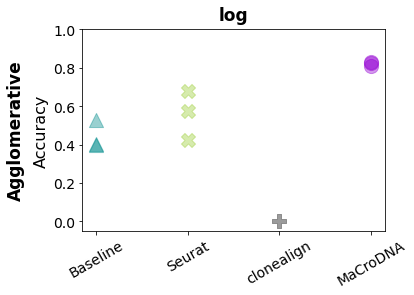

In [5]:
"""
accuracy plot
"""

utils.plot_results_accuracy(intgr_results, CLUSTER_METHOD,CLUSTER_TRANS,cluster_info,RANDOM_PATH)

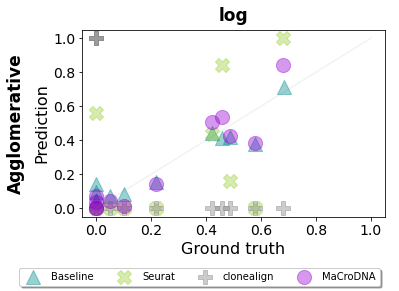

In [6]:
"""
clone prevalence
"""

utils.plot_results_clone_prevalence(intgr_results, CLUSTER_METHOD, CLUSTER_TRANS, cluster_info, RANDOM_PATH)